In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train_v2.csv')

/home/salah/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (135,204,274,417,462) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:
del data['id']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
d=StandardScaler()

In [9]:
data=data.dropna()
t=d.fit_transform(data)

In [10]:
y_train = data.pop('loss')

In [26]:
y_train.describe()

count    51940.000000
mean         0.824336
std          4.083566
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: loss, dtype: float64

In [13]:
from sklearn.cross_validation import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(t, y_train,test_size=0.33,random_state=9)

import numpy as np
train = X_train_1.astype(float)
test = X_test_1.astype(float)
label = np.log( y_train_1.astype(float))
label_t = y_test_1.astype(float)

/home/salah/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


In [20]:
import matplotlib.pylab as plt
%matplotlib inline

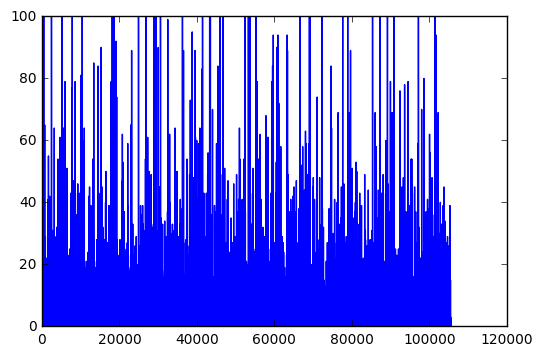

In [16]:
plt.plot(y_train)

In [14]:
import xgboost as xgb

In [17]:
param_grid = {'learning_rate': [0.01],'max_depth':[7] }
boost = xgb.XGBRegressor(n_estimators=500,nthread=4, silent=False, colsample_bytree=0.8,reg_lambda=0.4,reg_alpha=0.5,seed=6)
boost.fit(X_train_1,y_train_1)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=4,
       objective='reg:linear', reg_alpha=0.5, reg_lambda=0.4,
       scale_pos_weight=1, seed=6, silent=False, subsample=1)

In [18]:
yhat=boost.predict(X_test_1)


#############################################
from sklearn import metrics

mse = metrics.mean_squared_error(yhat, y_test_1)
'%f' % mse


'0.025903'

In [27]:
pd.DataFrame(yhat)

,0
0,0.000008
1,2.998845
2,0.000253
3,0.000117
4,-0.000269
5,12.984633
6,-0.000093
7,-0.000171
8,0.000297
9,0.000106


In [24]:
y_test_1

83881      0
14338      3
42150      0
52551      0
99982      0
41734     13
65640      0
97123      0
88020      0
95406      0
91016      0
30600      0
91442      0
35618      0
61925      0
40597      0
73847      0
45637      0
4791       0
28577      0
89172      0
46562      0
81844      0
28938      0
2201       0
81601      0
25252      0
72187      0
38188      0
66437      0
          ..
82235      4
11310      0
19715      0
64923     11
47326      0
65526      0
103885     0
88975      0
71789      0
83398      0
16006      0
71851      0
93832      0
80704      0
53309      0
102765     1
7148       0
97492      0
46571      0
73092      0
36350      0
11932      0
62872      0
32606      0
45655      0
63730      0
92015      0
92564      7
100982     0
72429      0
Name: loss, dtype: int64